<a href="https://colab.research.google.com/github/sirunde/FaceRecognition/blob/master/assignment_1_Park_B00977950.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jiyun Park B00977950 jpark430@binghamton.edu

In [ ]:
# restart runtime
import os
os.kill(os.getpid(), 9)

In [6]:
!pip install -U numpy
!pip install -U matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 44.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [28]:
import numpy as np
import scipy
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import numpy as np
print(np.__version__)

2.1.1


## 1 Numerical Inversion by Binary Search [16 points]

In [ ]:
def Transcendental(x):
  return x*np.exp(x)+x


In [ ]:
def gamma(x):
  return scipy.special.gamma(x)

In [ ]:
def invert(func, y, d=()):
  def setbound(func,y):
    setting = False
    if(func(0)< y):
      p1 = 0
      setting = True
    else:
      p2 = 0
    if (d):
      p1 = d[0]
      p2 = d[1]
      return p1,p2
    if setting == True:
      x = p1
      while(True):
        if func(x)< y:
          x =x*2+1
        else:
          p2 = x
          break
    else:
      x = p2
      while(True):
        if func(x)> y:
          x = x*2-1
        else:
          p1 = x
          break
    return p1,p2

  p1,p2 = setbound(func,y)
  print(p1,p2)

  diff= 1e-8
  x = (p1+p2)/2
  output = func(x)
  while(output >= y+diff or output <= y-diff):
    if (output >= y+diff):
      p2 = x
      x = (p1+p2)/2
    if (output <= y-diff):
      p1 = x
      x = (p1+p2)/2
    output = func(x)

  return x

In [ ]:
# Test case
a = invert(Transcendental,13788,)
print(a)
print(Transcendental(a))

0 15
7.51421256154174
13788.000000009279


In [ ]:
print(Transcendental(12))

1953069.497028047


## 2 Numerical Integration [7 points]

In [ ]:
def integrate(func,lo,hi):
  lower = lo
  higher = hi
  sampl = 500_000
  sum = 0
  for i in range(sampl):
    rand = random.uniform(lo,hi)
    sum += func(rand)

  output = ((higher-lower)*sum)/(sampl)
  return output


In [ ]:
def sinx(x):
  return np.sin(x)/x
sinx(3)

0.0470400026866224

In [ ]:
# Test case
print(integrate(sinx,-1,1))

1.8920739691097914


## 3 Gradient Descent [39 points]

In [4]:
from matplotlib import pyplot as plt

In [15]:
def opt(grad, start,step, maximum = 0.001):
  p = start
  threshold = 1e-4
  path = []
  path.append(p)
  value = grad(p)
  value = (min(value[0], maximum), min(value[1], maximum))
  value = (max(value[0], -maximum), max(value[1], -maximum))
  p = (p[0] - step * value[0], p[1] - step * value[1])
  prev = value
  while True:
    prev = value
    value = grad(p)
    value = (min(value[0], maximum), min(value[1], maximum))
    value = (max(value[0], -maximum), max(value[1], -maximum))

    if prev == (-value[0],-value[1]):
      break

    p = (p[0] - step * value[0], p[1] - step * value[1])
    path.append(p)
  return path

In [113]:
def thcf(p):
    x1, x2 = p
    return 2*x1**2 - 1.05*x1**4 + (x1**6)/6 + x1*x2 + x2**2

In [115]:
def thcf_grad(p):
  x1, x2 = p
  grad_x1 = 4*x1-4.2* x1**3+ x1**5+x2
  grad_x2 = x1+2*x2
  return (grad_x1,grad_x2)

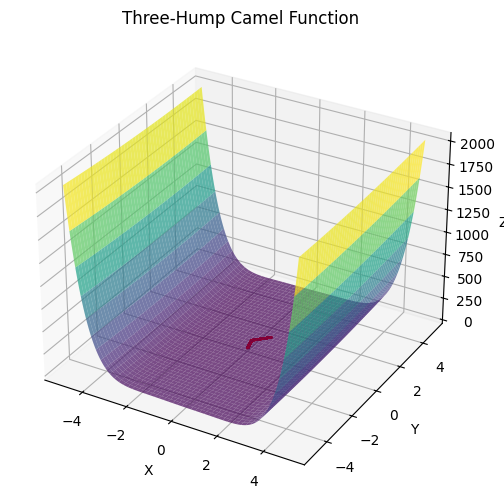

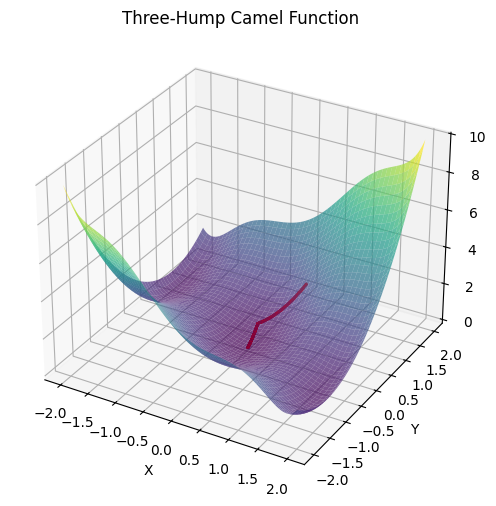

In [155]:
lo = -5
hi = 5
output = []

for i in range(1_000):
  randx = random.uniform(lo,hi)
  randy = random.uniform(lo,hi)
  output.append(opt(thcf_grad,(randx,randy),1))
mini = output[0]
for i in output:
  if thcf(mini[-1]) > thcf(i[-1]):
    mini = i
# Create a grid of values for x and y
x_vals = np.linspace(-5, 5, 400)  # 400 points between -2 and 2
y_vals = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute Z values using the Three-Hump Camel Function
Z = thcf((X, Y))  # thcf now handles arrays properly

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

path_x, path_y = zip(*mini)
path_z = [thcf((x, y)) for x, y in mini]
plt.plot(path_x, path_y,path_z, marker='o', color='red', label='Optimization Path', linewidth=1, markersize=0.5)

ax.set_title("Three-Hump Camel Function")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

x_vals = np.linspace(-2, 2, 400)  # 400 points between -2 and 2
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute Z values using the Three-Hump Camel Function
Z = thcf((X, Y))  # thcf now handles arrays properly

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

path_x, path_y = zip(*mini)
path_z = [thcf((x, y)) for x, y in mini]
plt.plot(path_x, path_y,path_z, marker='o', color='red', label='Optimization Path', linewidth=1, markersize=0.5)

ax.set_title("Three-Hump Camel Function")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

In [83]:
def sf(p):
  x1,x2 = p

  output = sum(map(lambda i: i * np.cos((i + 1)*x1 + i), range(1,6)))*sum(map(lambda i: i * np.cos((i + 1)*x2 + i), range(1,6)))
  return (output)


In [71]:
def sf_grad(p):
    x, y = p
    grad_x = -sum(i * (i + 1) * np.sin((i + 1) * x + i) * np.cos((i + 1) * y + i) for i in range(1, 6))
    grad_y = -sum(i * (i + 1) * np.cos((i + 1) * x + i) * np.sin((i + 1) * y + i) for i in range(1, 6))
    return (grad_x, grad_y)

(-0.8009408109920269, -7.708618860115999)


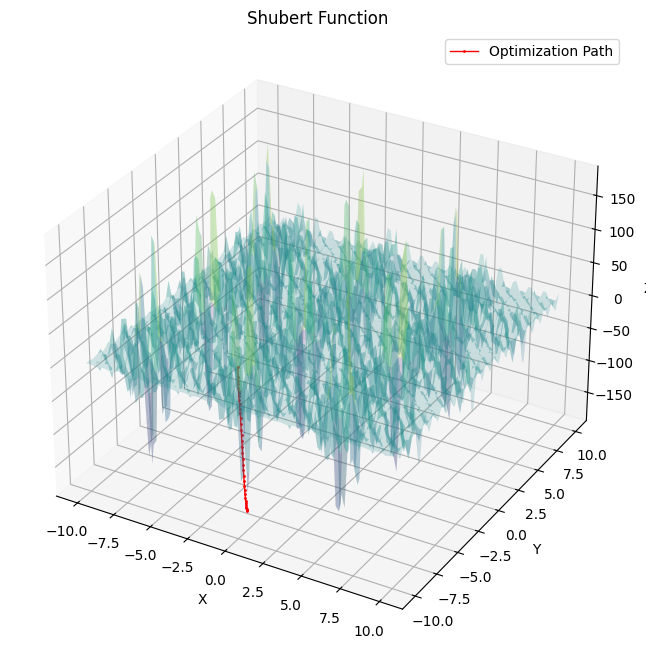

In [160]:
lo = -10
hi = 10
output = []

for i in range(10_000):
  randx = random.uniform(lo,hi)
  randy = random.uniform(lo,hi)
  output.append(opt(sf_grad,(randx,randy),1,0.01))
mini = output[0]
for i in output:
  if sf(mini[-1]) > sf(i[-1]):
    mini = i
print(mini[-1])
# Create a grid of values for x and y
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = sf((X, Y))


# Create a 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.2)

path_x, path_y = zip(*mini)
path_z = [sf((x, y)) for x, y in mini]
plt.plot(path_x, path_y,path_z, marker='o', color='red', label='Optimization Path', linewidth=1, markersize=1)

ax.set_title("Shubert Function")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()

## 4 Random Variates [38 points]